In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in 'gdp_df'? What are the data types of each column?

In [3]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

There are 7176 rows and 4 columns in the dataframe.
Country or Area's type is object, Year's is int64, Value and Value Footnotes are both float64. 

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df.rename(columns = {"Country or Area": "Country","Value": "GDP_Per_Capita"}, inplace=True)
gdp_df.drop("Value Footnotes", axis=1, inplace=True)

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [5]:
country_occurance_series = gdp_df['Country'].value_counts()
print(country_occurance_series)

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64


In [6]:
print(country_occurance_series[country_occurance_series == 31])

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
IDA only                                        31
Fragile and conflict affected situations        31
Ireland                                         31
France                                          31
Italy                                           31
Name: Country, Length: 205, dtype: int64


The answer is 205. Only 37 countries lack any years recorded.

In [7]:
print(country_occurance_series[country_occurance_series < 31])

Turkmenistan                 30
Hungary                      30
Slovak Republic              29
Cambodia                     28
West Bank and Gaza           27
Bosnia and Herzegovina       27
Slovenia                     26
Latvia                       26
Israel                       26
Lithuania                    26
Serbia                       26
Moldova                      26
Iceland                      26
Croatia                      26
Estonia                      26
Kuwait                       26
Maldives                     26
Canada                       24
Montenegro                   24
Small states                 24
San Marino                   24
Libya                        22
Other small states           21
Liberia                      21
Timor-Leste                  21
CuraÃ§ao                     21
Qatar                        21
Palau                        21
SÃ£o TomÃ© and Principe      20
Afghanistan                  19
Nauru                        17
Cayman I

In [8]:
imperfect_attendees = country_occurance_series[country_occurance_series < 31]

In [9]:
imperfect_attendees = imperfect_attendees.to_frame()

In [10]:
imperfect_attendees = imperfect_attendees.reset_index()

In [11]:
imperfect_attendees.columns = ['Country', 'Country Appearances']

In [12]:
impatt_rows = gdp_df['Country'].isin(imperfect_attendees['Country'])
gdp_df[impatt_rows].sort_values(by = 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
5878,Somalia,2013,877.301006
5877,Somalia,2014,917.876549
5876,Somalia,2015,1026.038180
5874,Somalia,2017,1079.112443
5875,Somalia,2016,1081.763907
...,...,...,...
5385,Qatar,2016,95601.807314
5391,Qatar,2010,95908.312817
5386,Qatar,2015,95965.251237
5389,Qatar,2012,96261.487335


I wanted to dig deeper and see if the countries that were missing data were poorer. Doesn't seem to be the case.

Also, shouldn't we be dropped the regions for data consistency? They aren't countries...

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [13]:
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


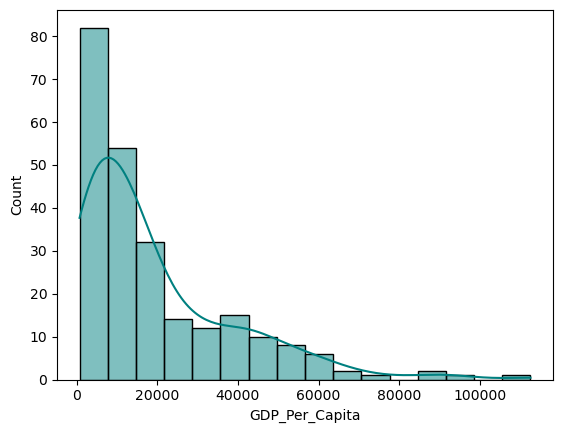

In [14]:
sns.histplot(data=gdp_2020, x= "GDP_Per_Capita", color="teal", kde=True)
plt.show()

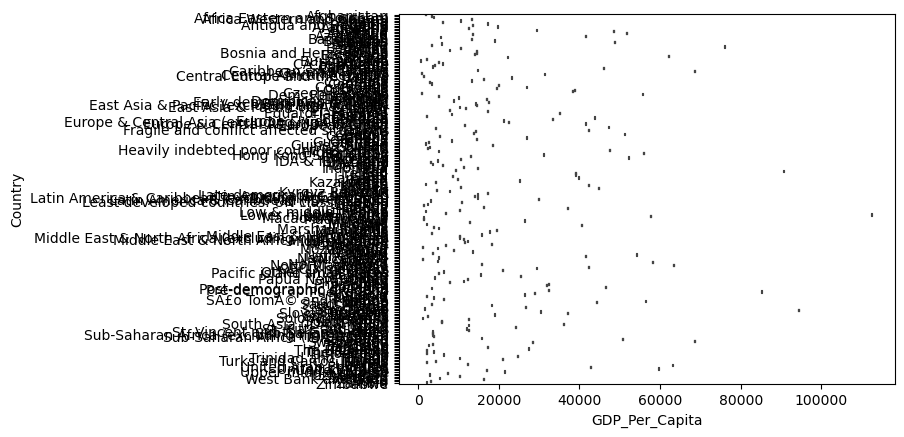

In [15]:
sns.boxplot(x=gdp_2020["GDP_Per_Capita"], y=gdp_2020['Country'])
plt.show()

this looks like a bad online horror story with the crazy text

In [16]:
print(gdp_df.isnull().values.any()) #I was looking at an article on how to make the next chart and it mentioned doing this to guarantee the dataset wasn't weird.

False


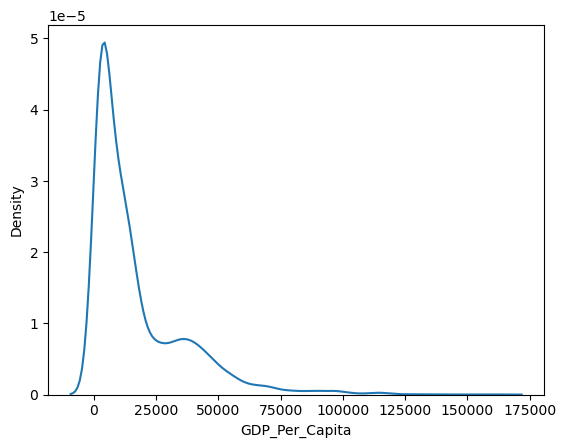

In [17]:
sns.kdeplot(gdp_df['GDP_Per_Capita'])
plt.show()

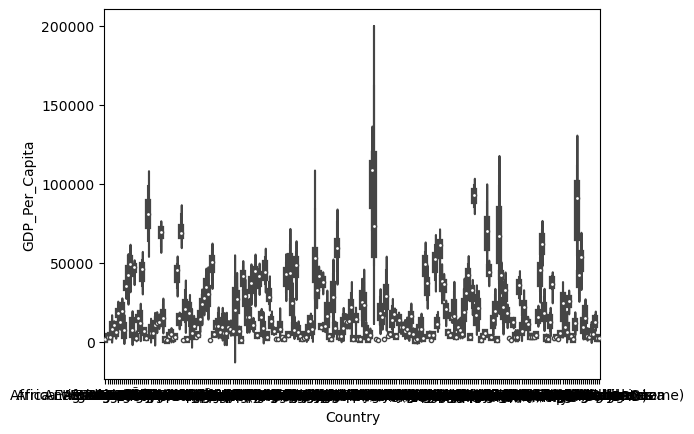

In [18]:
sns.violinplot(x=gdp_df['Country'], y=gdp_df['GDP_Per_Capita'])
plt.show()

There are too many groups for the violin and boxplots to be useful, honestly.
I feel the boxplot and the density charts mostly show the same information. The main difference being density seems to be a little more accurate in depicting the actual data curve. It looks like a lot of countries are around 125k~ gdp which is where my box plot cutoff for the two bins seems to be. Changing the number of bins might help with that, but I'll leave it in for posterity right now.

9. What was the median GDP per capita value in 2020?

In [19]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2020.0,19496.881712
std,0.0,19586.817493
min,2020.0,731.064074
25%,2020.0,4945.083068
50%,2020.0,12908.937406
75%,2020.0,27196.648661
max,2020.0,112557.309472


12908.937406 is the median for 2020, which supports my statement in the prior post, hooray. The mean is really skewed high, probably because of the regions messing things up.

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [20]:
decades = [1990, 2000, 2010, 2020]

gdp_decades = gdp_df[gdp_df['Year'].isin(decades)]
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


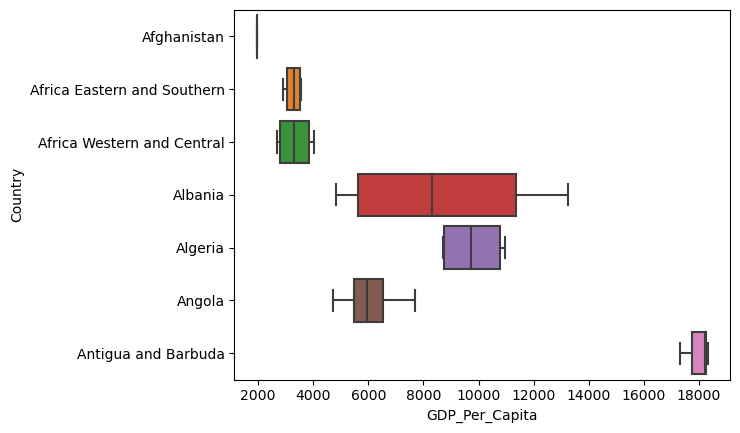

In [21]:
sns.boxplot(x=gdp_decades["GDP_Per_Capita"].head(25), y=gdp_decades["Country"].head(25))
plt.show()

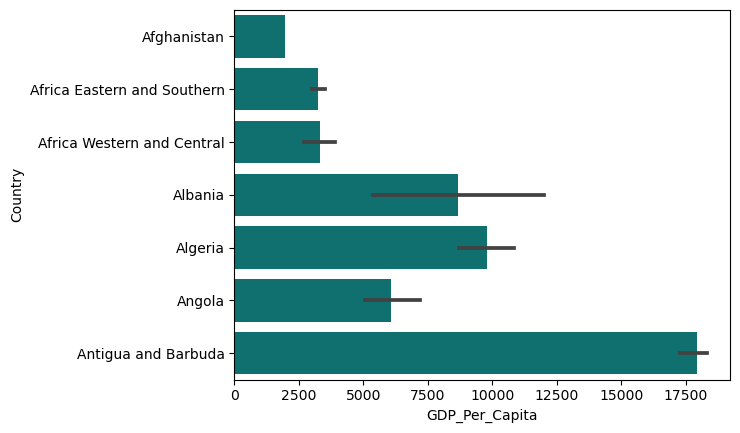

In [22]:
sns.barplot(x="GDP_Per_Capita", y="Country", data=gdp_decades.head(25), color="teal")
plt.show()

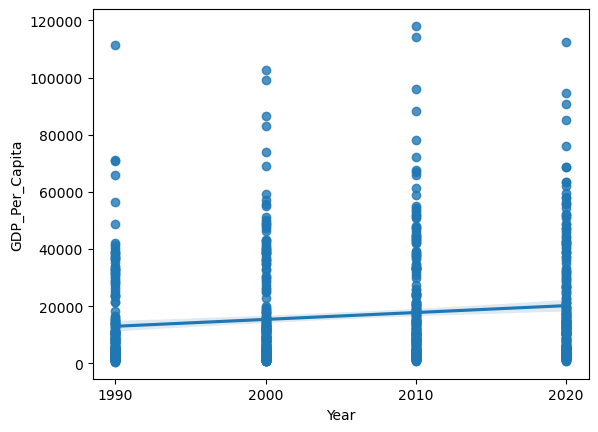

In [23]:
gdp_scatterplot = sns.regplot(y=gdp_decades['GDP_Per_Capita'], x=gdp_decades['Year'])
gdp_scatterplot.xaxis.set_major_locator(ticker.MultipleLocator(10))
gdp_scatterplot.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

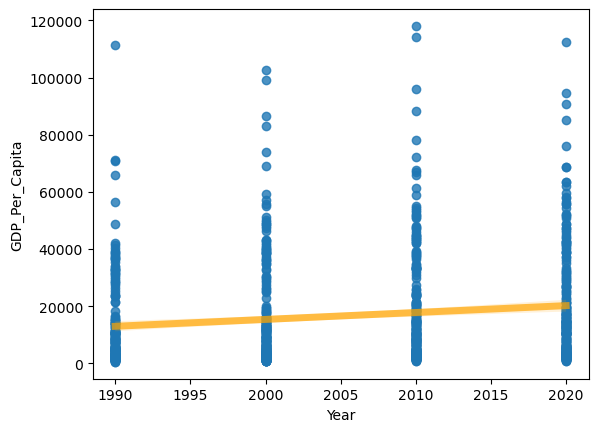

In [24]:
gdp_scatterplot_trendline = sns.regplot(y=gdp_decades['GDP_Per_Capita'], x=gdp_decades['Year'], line_kws={"color":"orange", "alpha":0.7,"lw":5})
plt.show()

Well, the trendline helps show me that GDP has gone up over time. I think the boxplot does a better job representing the stdev of a value, the barplot makes it look like algeria and albania are nearly equal, but the boxplot shows that's not true and albania has just been all over the place.

A lineplot would be better to show growth over time, though...

11. Which country was the first to have a GDP per capita greater than $100,000?

In [25]:
high_gdpers = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]

earliest_hgdper = high_gdpers.loc[high_gdpers['Year'] == high_gdpers['Year'].min()]
earliest_hgdper

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


The UAE had a GDP of 100+ in 1990, the earliest year recorded in the dataset.

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [26]:
richest_country = gdp_df[gdp_df['Year'] == 2020].sort_values(by = "GDP_Per_Capita", ascending = False).head(1)
richest_country

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


Luxembourg had a GDP per Capita of 112557~ in 2020, the highest in the dataset.

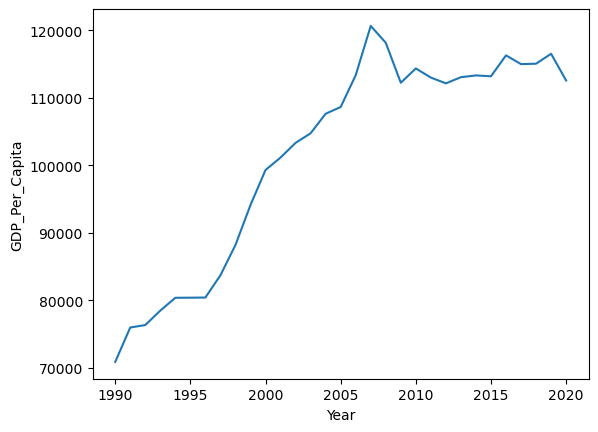

In [27]:
sns.lineplot(data = gdp_df[gdp_df['Country'] == 'Luxembourg'], x='Year', y='GDP_Per_Capita')
plt.show()

21st century looks good on you, Luxembourg

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [28]:
poorest_country = gdp_df[gdp_df['Year'] == 2020].sort_values(by = "GDP_Per_Capita").head(1)
poorest_country

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074


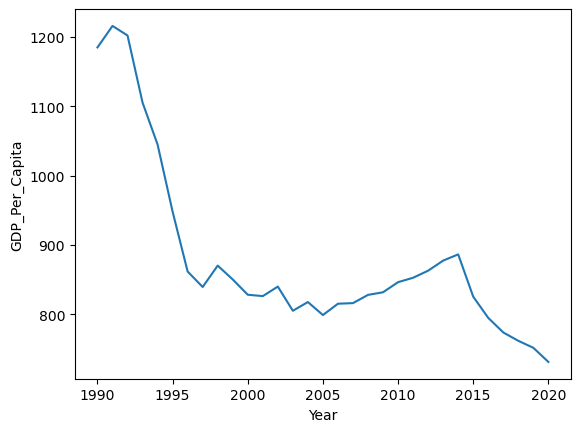

In [29]:
sns.lineplot(data = gdp_df[gdp_df['Country'] == 'Burundi'], x='Year', y='GDP_Per_Capita')
plt.show()

"Burundi is one of the poorest countries in the world with more than 70 percent of the population living in poverty. Food insecurity levels are alarming with 52 percent of children under 5 stunted and even higher levels of malnutrition among rural communities." (https://www.wfp.org/countries/burundi).

**Bonus question:** Is it true in general that countries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [30]:
gdp_1990 = gdp_decades[gdp_decades['Year'] == 1990]
gdp_1990

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [31]:
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [32]:
gdp1990_set = set(gdp_1990['Country'])
gdp2020_set = set(gdp_2020['Country'])
gdp2020_set

{'Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'CuraÃ§ao',
 'Cyprus',
 'Czech Republic',
 "CÃ´te d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD)',
 'East Asia & Pacific (excluding high income)',
 'Ecuador'

In [33]:
gdp_2020_filt= gdp_2020[gdp_2020['Country'].isin(gdp1990_set)]
gdp_1990_filt= gdp_1990[gdp_1990['Country'].isin(gdp2020_set)]
gdp_2020_filt

,Country,Year,GDP_Per_Capita
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
143,Angola,2020,6141.963839
...,...,...,...
6994,Vanuatu,2020,2878.475335
7025,Vietnam,2020,10338.270543
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [34]:
gdp_1990_filt

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [35]:
gdp_fallers = pd.merge(gdp_1990_filt, gdp_2020_filt,how='inner', on = 'Country')
gdp_fallers

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104
1,Africa Western and Central,1990,2810.341129,2020,4021.293919
2,Albania,1990,4827.034551,2020,13253.733337
3,Algeria,1990,8746.340762,2020,10735.382539
4,Angola,1990,5758.950488,2020,6141.963839
...,...,...,...,...,...
200,Vanuatu,1990,2855.554643,2020,2878.475335
201,Vietnam,1990,2066.372215,2020,10338.270543
202,World,1990,9704.621768,2020,16269.969854
203,Zambia,1990,2190.181724,2020,3277.816510


In [36]:
gdp_fallers.rename(columns = {"GDP_Per_Capita_x": "GDP_Per_Capita_1990", "GDP_Per_Capita_y":"GDP_Per_Capita_2020"}, inplace=True)
gdp_fallers

,Country,Year_x,GDP_Per_Capita_1990,Year_y,GDP_Per_Capita_2020
0,Africa Eastern and Southern,1990,3083.976800,2020,3491.978104
1,Africa Western and Central,1990,2810.341129,2020,4021.293919
2,Albania,1990,4827.034551,2020,13253.733337
3,Algeria,1990,8746.340762,2020,10735.382539
4,Angola,1990,5758.950488,2020,6141.963839
...,...,...,...,...,...
200,Vanuatu,1990,2855.554643,2020,2878.475335
201,Vietnam,1990,2066.372215,2020,10338.270543
202,World,1990,9704.621768,2020,16269.969854
203,Zambia,1990,2190.181724,2020,3277.816510


In [37]:
gdp_fallers.drop(['Year_x', 'Year_y'], axis=1, inplace=True)

In [38]:
gdp_fallers = gdp_fallers[gdp_fallers['GDP_Per_Capita_1990'] > gdp_fallers['GDP_Per_Capita_2020']]
gdp_fallers

,Country,GDP_Per_Capita_1990,GDP_Per_Capita_2020
9,Aruba,32589.018572,29563.756955
15,Barbados,13985.829980,13316.487393
25,Brunei,71232.789430,62200.882043
28,Burundi,1184.842032,731.064074
33,Central African Republic,1201.674665,937.856470
39,Comoros,3061.328732,2984.413403
40,Congo,5068.286948,3497.565454
44,Dem. Rep. Congo,1819.723315,1082.445242
65,Fragile and conflict affected situations,4874.531032,4450.512739
67,Gabon,18179.170002,14320.844646


The countries that had a lower GDP in 2020 than 1990 are: Aruba, Barbados, Brunei, Burundi, Central African Republic, Comoros, Congo, Dem. Rep. Congo, Gabon, Guinea-Bissau, Haiti, Kiribati, Kyrgyz Republic, Madagascar, Oman, Tajikistan, The Bahamas, The Gambia, Ukraine, the UAE, and Zimbabwe. The grouping 'Fragile and conflict affected situations' also had a lower GDP.

Re-reading the question made me realize I was supposed to check to see if countries did have higher GDP in 2020 than 1990. The fact that only these 30~ countries fell and the rest grew says the answer is yes.

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [39]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)

In [40]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [41]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [42]:
internet_df.rename(columns = {"Country or Area": "Country","Value": "Internet_Users_Pct"}, inplace=True)
internet_df.drop("Value Footnotes", axis=1, inplace=True)
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?

In [43]:
internet_df.value_counts('Year')

Year
1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2001    201
2005    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1965      7
1980      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
dtype: int64

why is there data going back to 1960??? Also, 1990 had the most entries despite having years after it? This seems like its a mess.

17. What is the first year to have a non-zero internet users percentage value?

In [44]:
nz_iusers = internet_df.loc[internet_df['Internet_Users_Pct'] > 0]
nz_iusers['Year'].min()

1990

Also 1990. Why is there data pre-1990...?

18. How does the distribution of internet users percent differ for 2000 and 2014?

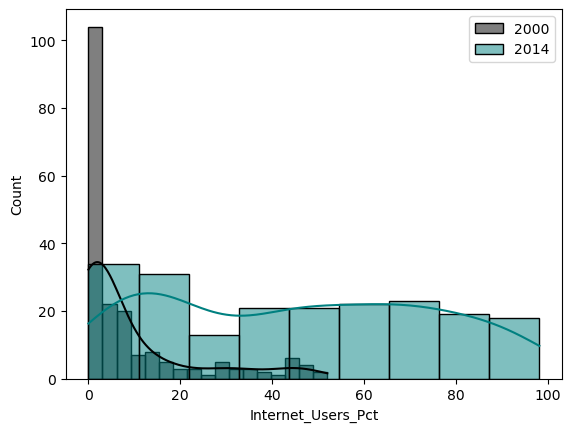

In [45]:
internet_2000 = internet_df[internet_df['Year'] == 2000]
internet_2014 = internet_df[internet_df['Year'] == 2014]

sns.histplot(data=internet_2000, x="Internet_Users_Pct", label="2000", kde=True, color="black")
sns.histplot(data=internet_2014, x="Internet_Users_Pct", label="2014", kde=True, color="teal")

plt.legend()
plt.show()

In the year 2000 few countries had widespread internet access, whereas in 2014 most countries had at least a third of their population with access.

19. For how many countries was the percentage of internet users below 5% in 2014?

In [46]:
print(internet_2014[internet_2014['Internet_Users_Pct'] < 5.0])

                                 Country  Year  Internet_Users_Pct
623                              Burundi  2014                1.38
762                 Central African Rep.  2014                4.03
782                                 Chad  2014                2.50
909   Congo (Democratic Republic of the)  2014                3.00
1065         Dem. People's Rep. of Korea  2014                0.00
1256                             Eritrea  2014                0.99
1299                            Ethiopia  2014                2.90
1720                              Guinea  2014                1.72
1742                       Guinea-Bissau  2014                3.32
2453                          Madagascar  2014                3.70
2814                             Myanmar  2014                2.10
2975                               Niger  2014                1.95
3533                        Sierra Leone  2014                2.10
3648                             Somalia  2014                

There are 16 countries who had less than 5% of their users having access to the internet.

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [47]:
gdp_and_internet_use = pd.concat([internet_df, gdp_df])
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
7171,Zimbabwe,1994,NaN,2603.927369
7172,Zimbabwe,1993,NaN,2420.092791
7173,Zimbabwe,1992,NaN,2437.152908
7174,Zimbabwe,1991,NaN,2733.696626


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [48]:
highwebcountries = set(internet_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).Country.head(3))
highwebcountries

{'Bermuda', 'Iceland', 'Norway'}

Iceland, Bermuda, and Norway have the highest percentage of internet users.

In [49]:
gdp_df[gdp_df['Country'].isin(highwebcountries)]

,Country,Year,GDP_Per_Capita
639,Bermuda,2020,76105.138057
640,Bermuda,2019,81681.726668
641,Bermuda,2018,81423.408453
642,Bermuda,2017,81834.955874
643,Bermuda,2016,78149.352535
...,...,...,...
4900,Norway,1994,47541.766710
4901,Norway,1993,45512.390217
4902,Norway,1992,44517.435716
4903,Norway,1991,43229.916320


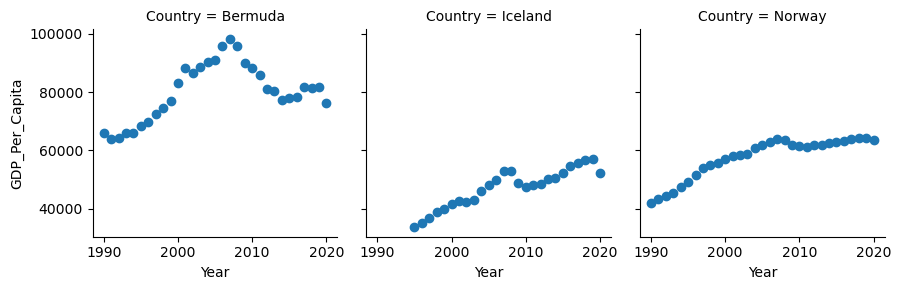

In [50]:
gdptrackgrid = sns.FacetGrid(data=gdp_df[gdp_df['Country'].isin(highwebcountries)], col='Country')
gdptrackgrid.map(plt.scatter, "Year","GDP_Per_Capita").add_legend()
plt.show()

Bermuda's GDP steadily rose through the 90s and 2000s, fell off in the 2010s, and has stayed consistent since (sans 2020 where everyone probably took a dive).

Iceland has been slowly rising since 1990, diving in the late 2000s and 2020, presumably due to the recessions.

Norway has risen pretty steadily as well, starting off better than Iceland and taking smaller dips in the recession years.

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [51]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.39,NaN
15,Albania,2014,60.10,NaN
36,Algeria,2014,18.09,NaN
59,Andorra,2014,95.90,NaN
78,Angola,2014,21.26,NaN
...,...,...,...,...
7031,Vietnam,2014,NaN,7601.858491
7062,West Bank and Gaza,2014,NaN,5967.073437
7089,World,2014,NaN,15224.439424
7120,Zambia,2014,NaN,3450.037600


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [52]:
gdp_and_internet_use_2014_grouped = gdp_and_internet_use_2014.groupby(by='Country').max('GDP_Per_Capita')

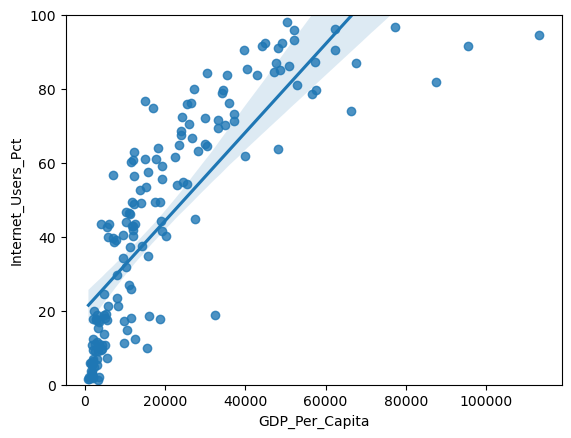

In [53]:
gdp_i_use_2014_chart = sns.regplot(x=gdp_and_internet_use_2014_grouped['GDP_Per_Capita'], y=gdp_and_internet_use_2014_grouped['Internet_Users_Pct'])
gdp_i_use_2014_chart.set_ylim(0, 100)
plt.show()

In [54]:
gdp_and_internet_use_2014_grouped.sort_values('GDP_Per_Capita', ascending=False).head(10)

,Year,Internet_Users_Pct,GDP_Per_Capita
Country,,,
"Macao SAR, China",2014,NaN,155201.740571
Luxembourg,2014,94.67,113313.578898
Qatar,2014,91.49,95578.261511
Singapore,2014,82.00,87616.637527
Bermuda,2014,96.80,77361.104881
Switzerland,2014,87.00,67682.686175
Cayman Islands,2014,74.10,66326.886773
Brunei,2014,NaN,64190.824147
United Arab Emirates,2014,90.40,62452.184508


Looks like a few countries didn't report internet usage, even among the wealthier ones. Cayman Islands having the 7th highest gdp but only 74% internet access is wild.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [55]:
qcut2014 = pd.qcut(gdp_and_internet_use_2014_grouped['GDP_Per_Capita'],3, labels = ['Low', 'Medium', 'High'])

In [56]:
gdp_and_internet_use_2014_grouped['GDP_group'] = list(qcut2014.values)
gdp_and_internet_use_2014_grouped.reset_index(inplace=True)
gdp_and_internet_use_2014_grouped[~gdp_and_internet_use_2014_grouped['Internet_Users_Pct'].isnull()]

,Country,Year,Internet_Users_Pct,GDP_Per_Capita,GDP_group
0,Afghanistan,2014,6.39,2102.384604,Low
3,Albania,2014,60.10,11586.833878,Medium
4,Algeria,2014,18.09,11512.690472,Medium
5,Andorra,2014,95.90,NaN,NaN
6,Angola,2014,21.26,8240.347981,Medium
...,...,...,...,...,...
273,Viet Nam,2014,48.31,NaN,NaN
275,Virgin Islands (U.S.),2014,50.07,NaN,NaN
278,Yemen,2014,22.55,NaN,NaN
279,Zambia,2014,17.34,3450.037600,Low


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [57]:
gdp2014_low = gdp_and_internet_use_2014_grouped[(gdp_and_internet_use_2014_grouped['GDP_group'] == "Low") & (~gdp_and_internet_use_2014_grouped['Internet_Users_Pct'].isnull())]
gdp2014_med = gdp_and_internet_use_2014_grouped[(gdp_and_internet_use_2014_grouped['GDP_group'] == "Medium") & (~gdp_and_internet_use_2014_grouped['Internet_Users_Pct'].isnull())]
gdp2014_high = gdp_and_internet_use_2014_grouped[(gdp_and_internet_use_2014_grouped['GDP_group'] == "High") & (~gdp_and_internet_use_2014_grouped['Internet_Users_Pct'].isnull())]

gdp2014_high.describe()

,Year,Internet_Users_Pct,GDP_Per_Capita
count,58.0,58.000000,58.000000
mean,2014.0,76.153793,42607.438441
std,0.0,15.390179,19023.877150
min,2014.0,18.860000,20210.996214
25%,2014.0,67.767500,27546.880266
50%,2014.0,78.740000,37237.289100
75%,2014.0,87.090000,50746.830650
max,2014.0,98.160000,113313.578898


In [58]:
gdp2014_med.describe()

,Year,Internet_Users_Pct,GDP_Per_Capita
count,52.0,52.000000,52.000000
mean,2014.0,41.584038,12933.129239
std,0.0,16.401298,3487.039093
min,2014.0,9.810000,6973.638909
25%,2014.0,31.200000,10398.402368
50%,2014.0,43.000000,12072.533363
75%,2014.0,52.802500,15515.326813
max,2014.0,76.670000,19240.224708


In [59]:
gdp2014_low.describe()

,Year,Internet_Users_Pct,GDP_Per_Capita
count,53.0,53.000000,53.000000
mean,2014.0,13.392830,3210.406096
std,0.0,12.210846,1532.176909
min,2014.0,1.140000,886.235296
25%,2014.0,5.410000,1979.607555
50%,2014.0,10.600000,2984.243485
75%,2014.0,17.700000,4241.881178
max,2014.0,56.800000,6911.803223


The internet % median from 2014 is: 10.6% for low-income, 43% for medium-income, and 78.74 for high-income.

At this point I trimmed out the regions from the gdp_df because it offended my sensibilities and I had time.

In [60]:
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
7171,Zimbabwe,1994,NaN,2603.927369
7172,Zimbabwe,1993,NaN,2420.092791
7173,Zimbabwe,1992,NaN,2437.152908
7174,Zimbabwe,1991,NaN,2733.696626


In [61]:
gdp_and_internet_use_gp = gdp_and_internet_use.groupby(by='Country').max('GDP_Per_Capita')
gdp_and_internet_use_gp = gdp_and_internet_use.groupby(by='Country').max('Internet_Users_Pct')
gdp_and_internet_use_gp

,Year,Internet_Users_Pct,GDP_Per_Capita
Country,,,
Afghanistan,2020,6.39,2116.465258
Africa Eastern and Southern,2020,NaN,3697.317275
Africa Western and Central,2020,NaN,4216.409204
Albania,2020,60.10,13653.201570
Algeria,2020,18.09,11826.151380
...,...,...,...
West Bank and Gaza,2020,NaN,6438.933640
World,2020,NaN,16973.695660
Yemen,2014,22.55,NaN


In [92]:
gdp_no_internet_list = list(gdp_no_internet['Country'])
type(gdp_no_internet_list)

list

In [93]:
gdp_df_cleaned = gdp_df[~gdp_df['Country'].isin(gdp_no_internet_list)]
gdp_df_cleaned

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


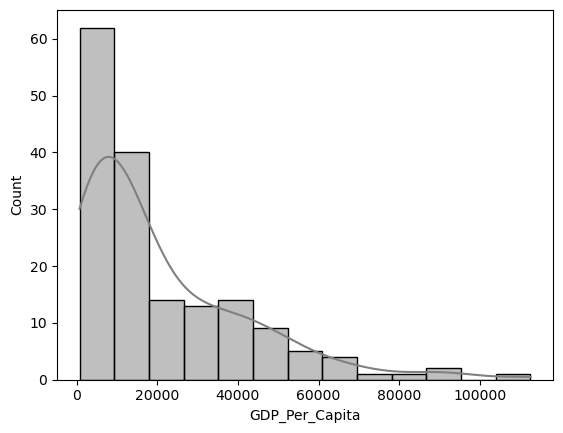

In [101]:
gdp_df_cleaned_2020 = gdp_df_cleaned[gdp_df_cleaned['Year'] == 2020]

sns.histplot(data=gdp_df_cleaned_2020, x="GDP_Per_Capita", color="grey", kde=True)
plt.show()

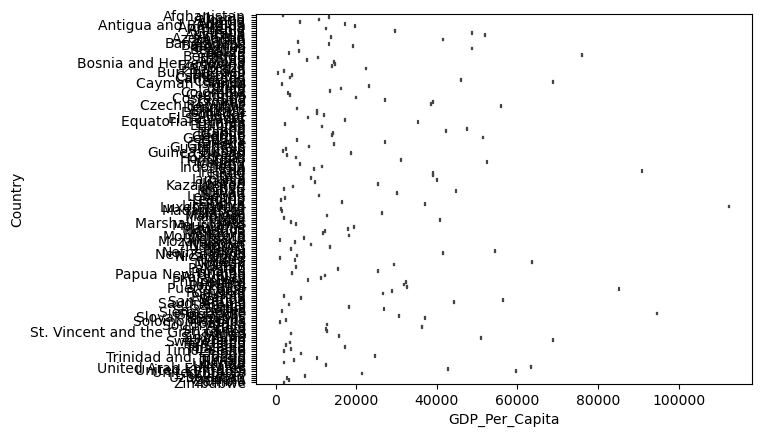

In [108]:
sns.boxplot(x=gdp_df_cleaned_2020["GDP_Per_Capita"], y=gdp_df_cleaned_2020['Country'])
plt.show()

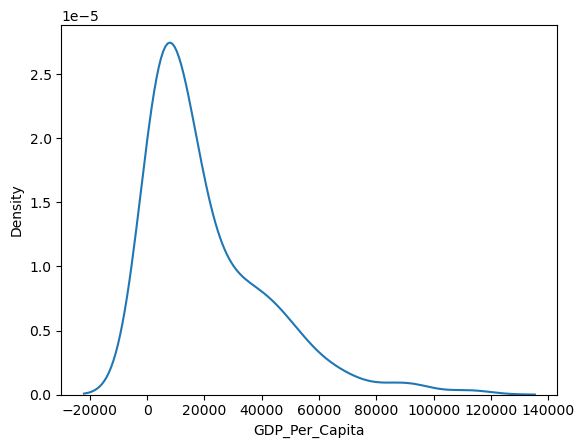

In [104]:
sns.kdeplot(gdp_df_cleaned_2020['GDP_Per_Capita'])
plt.show()